Author: Amalia Karalis

Date: 24/03/2022

Collaborators: Jasmine Parsons, Ana Hoban, Maude Lariviere

We want to evolve a strong adiabatic shock with $\gamma$=5/3 and reflective boudary conditions on both sides. The hydro equations we need to solve are:

Mass Conservation:
$$ \partial_t \rho + \partial_x(\rho u_x) = 0 $$ 

No source term.

Momentum Conservation:
$$ \partial_t(\rho u_i) + \partial_j(\rho u_i u_j) = - \partial_i(P) $$ 

The source term is the pressure gradient:
$$ \Delta(\rho u) = -dt/dx * \Delta(P) $$

Energy Conservation:
$$ \partial_t (\rho E) + \partial_x(\rho E u) = -\partial_x(\rho P u) $$

The source term is again the pressure gradient term:
$$ \Delta(\rho E) = -dt/dx * \Delta(\rho Pu)$$

For an adiabatic process,

P = $\kappa \rho^\gamma$

$c_s^2 = \gamma P/\rho$

The energy is:
$$ E = KE + IE = 1/2 \rho u^2 + \dfrac{P \gamma}{\rho (\gamma -1)} $$

Solve for P:
$$ P = \left[ \rho E - 0.5\dfrac{(\rho u)^2}{\rho} \right](\gamma -1)/\gamma$$

<IPython.core.display.Javascript object>


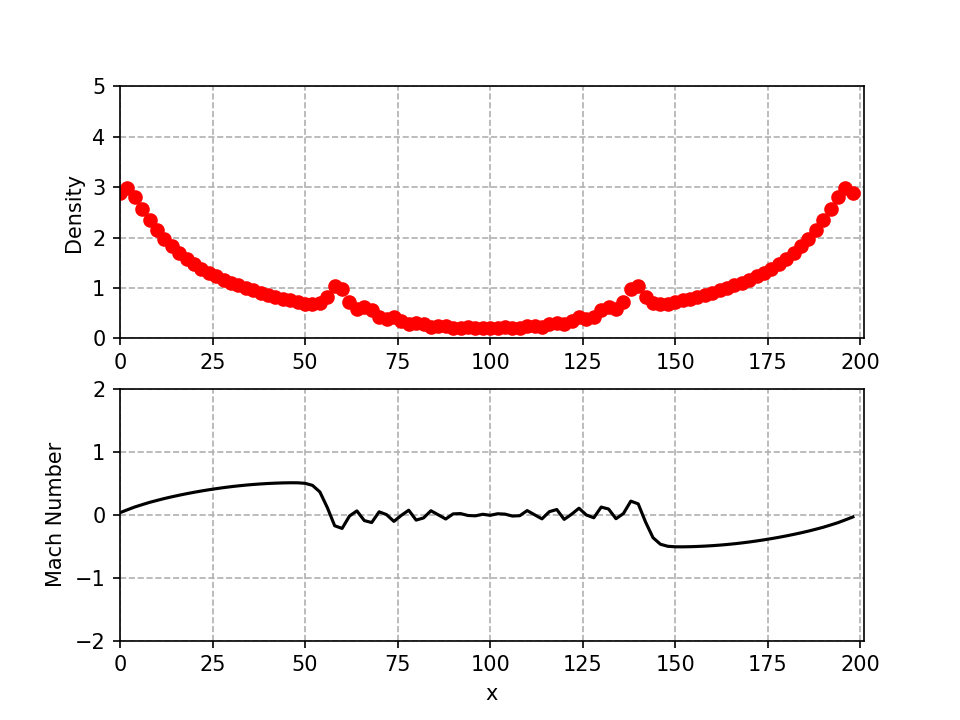

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

Ngrid = 100 # grid size
Nsteps = 1000 # number of timesteps
dt = 0.01
dx = 2.0
kappa = 1
gamma = 5/3

x = np.arange(Ngrid)*dx # grid
f1 = np.ones(Ngrid) # density
f2 = np.zeros(Ngrid)+0.0001 # momentum density
f3 = np.ones(Ngrid) # Energy density

P = (f3 - 0.5*f2**2/f1)*(gamma-1)/gamma  # pressure
cs2 = gamma*P/f1 # sound speed squared
u = np.zeros(Ngrid+1) # advective velocity
M = (f2/f1)/np.sqrt(cs2) # u = momentum / density

def advection(f, u, dt, dx):
    # calculate the flux terms
    J = np.zeros(len(f)+1) 
    J[1:-1] = np.where(u[1:-1] > 0, f[:-1] * u[1:-1], f[1:] * u[1:-1])
    # depending on if advection is positive or negative,
    #the flux is coming from the left (positive) or right (negative)
    # flux is zero at the boudaries, so first and last term are 0 (reflective boundary condition)
    f -= (dt/dx) * (J[1:] - J[:-1]) # update
    return f

# Apply initial gaussian pertubation to the energy
Amp, sigma = 5000, Ngrid/10
f3 += Amp * np.exp(-(x - x.max()/2) ** 2 / sigma ** 2)

# plot
plt.ion()
fig, ax = plt.subplots(2,1)

x1, = ax[0].plot(x, f1, 'ro')
x2, = ax[1].plot(x, M, color='black')

ax[0].set_xlim([0, dx*Ngrid+1])
ax[0].set_ylim([0, 5])
ax[1].set_xlim([0, dx*Ngrid+1])
ax[1].set_ylim([-2, 2])

ax[0].grid(ls='--')
ax[1].grid(ls='--')

ax[1].set_xlabel('x')
ax[0].set_ylabel('Density')
ax[1].set_ylabel('Mach Number')
fig.canvas.draw()


for ct in range(Nsteps):
    # advection velocity at the cell interface
    u[1:-1] = 0.5 * ((f2[:-1] / f1[:-1]) + (f2[1:] / f1[1:]))

    # update density, momentum and energy
    f1 = advection(f1, u, dt, dx)
    f2 = advection(f2, u, dt, dx)
    

    # add the source term
    P = (f3 - 0.5*f2**2/f1)*(gamma-1)/gamma # pressure
    cs2 = gamma*P/f1 # sound speed squared
    f2[1:-1] -= (dt / dx) * 0.5 * (P[2:] - P[:-2]) 

    # correct for source term at the boundary (reflective)
    f2[0] -= 0.5 * (dt / dx) * (P[1] - P[0])
    f2[-1] -= 0.5 * (dt / dx) * (P[-1] - P[-2])
    
    # re-calculate the advection velocities
    u[1:-1] = 0.5 * ((f2[:-1] / f1[:-1]) + (f2[1:] / f1[1:]))
    
    # update energy
    f3 = advection(f3, u, dt, dx)
    
    # re-calculate the pressure
    P = (f3 - 0.5*f2**2/f1)*(gamma-1)/gamma # pressure
    P_u = P * f2 / f1 # The source term in P*u*rho
    # add the source term to the energy
    f3[1:-1] -= 0.5 * (dt / dx) * (P_u[2:] - P_u[:-2])
    
    # apply the boundary conditions to the energy
    f3[0] -= 0.5 * (dt / dx) * (P_u[1] - P_u[0])
    f3[-1] -= 0.5 * (dt / dx) * (P_u[-1] - P_u[-2])
    
    P = (f3 - 0.5*f2**2/f1)*(gamma-1)/gamma # pressure
    cs2 = gamma*P/f1 # sound speed squared
    M = (f2/f1)/np.sqrt(cs2) # u = momentum / density
    
    # update the plot
    x1.set_ydata(f1)
    x2.set_ydata(M)
    fig.canvas.draw()
    plt.pause(0.001)

# 1. Ratio of densities
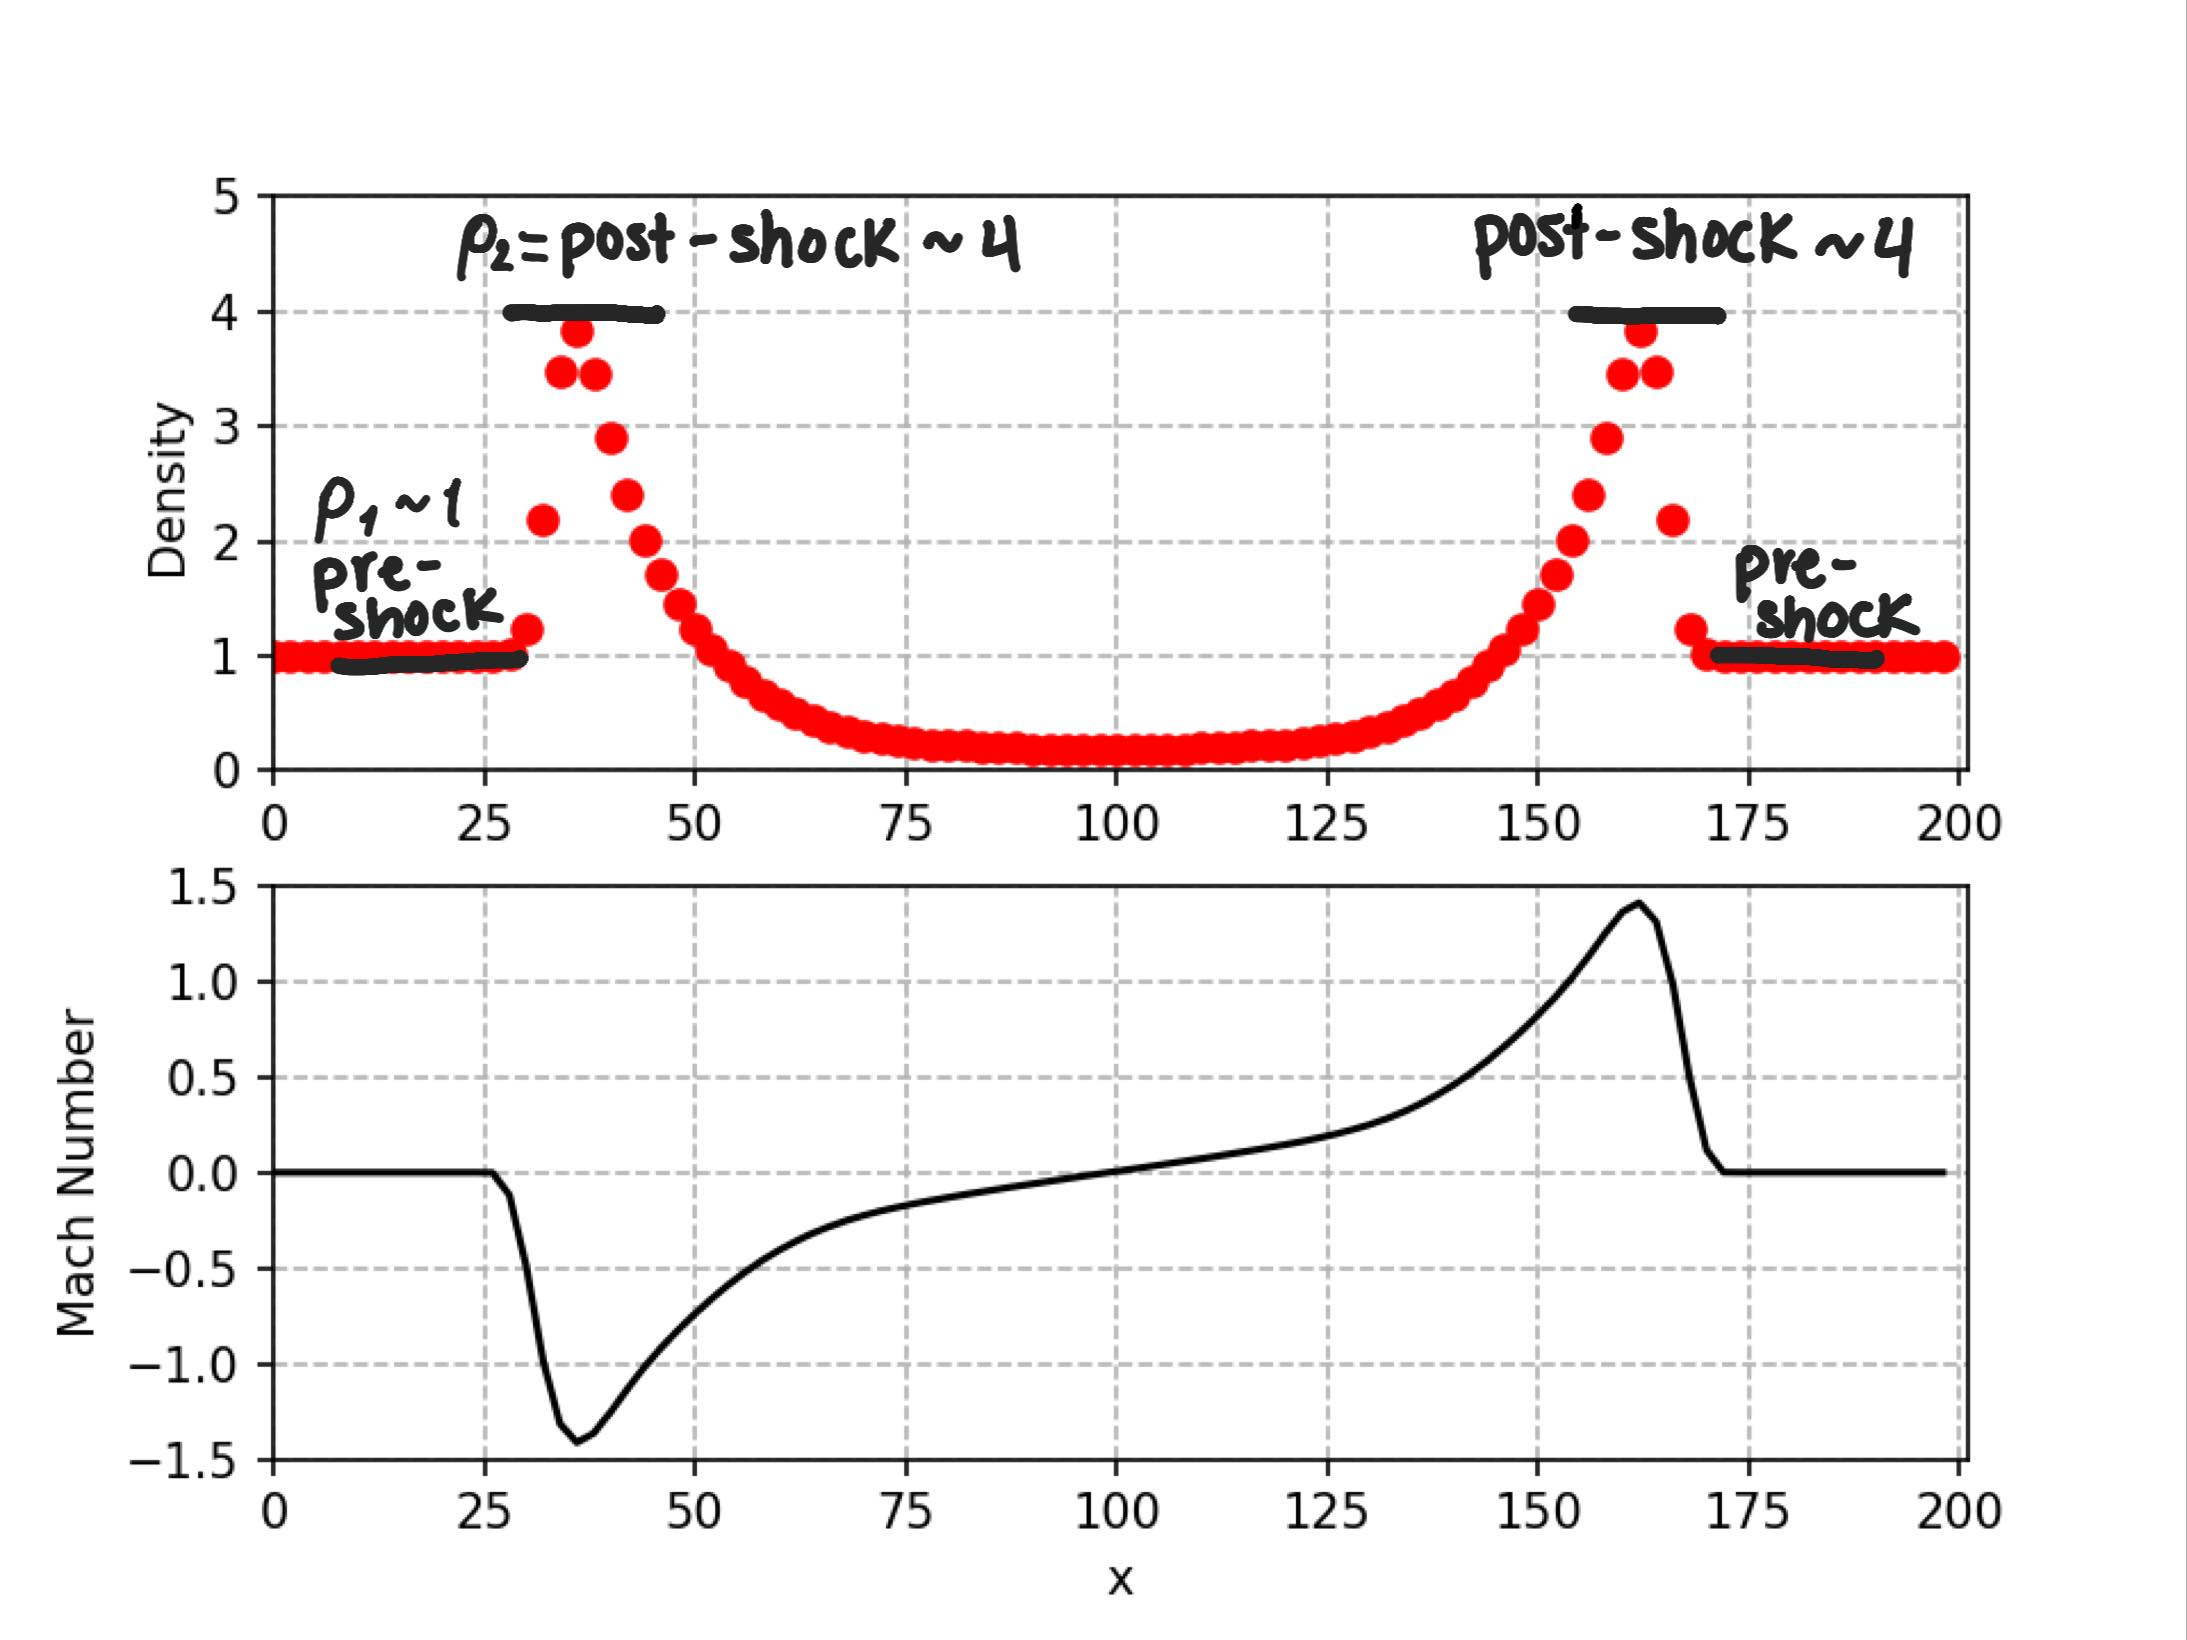
From the above image, we see that the pre-shock density $\rho_1$ ~ 1 and the post shock density $\rho_2$~4, so the ratio $\dfrac{\rho_1}{\rho_2} = \dfrac{1}{4}$. In class we found that in the limit of strong shock, $\dfrac{\rho_1}{\rho_2} = \dfrac{1}{4}$, which is what we found!

## 2. Shock width
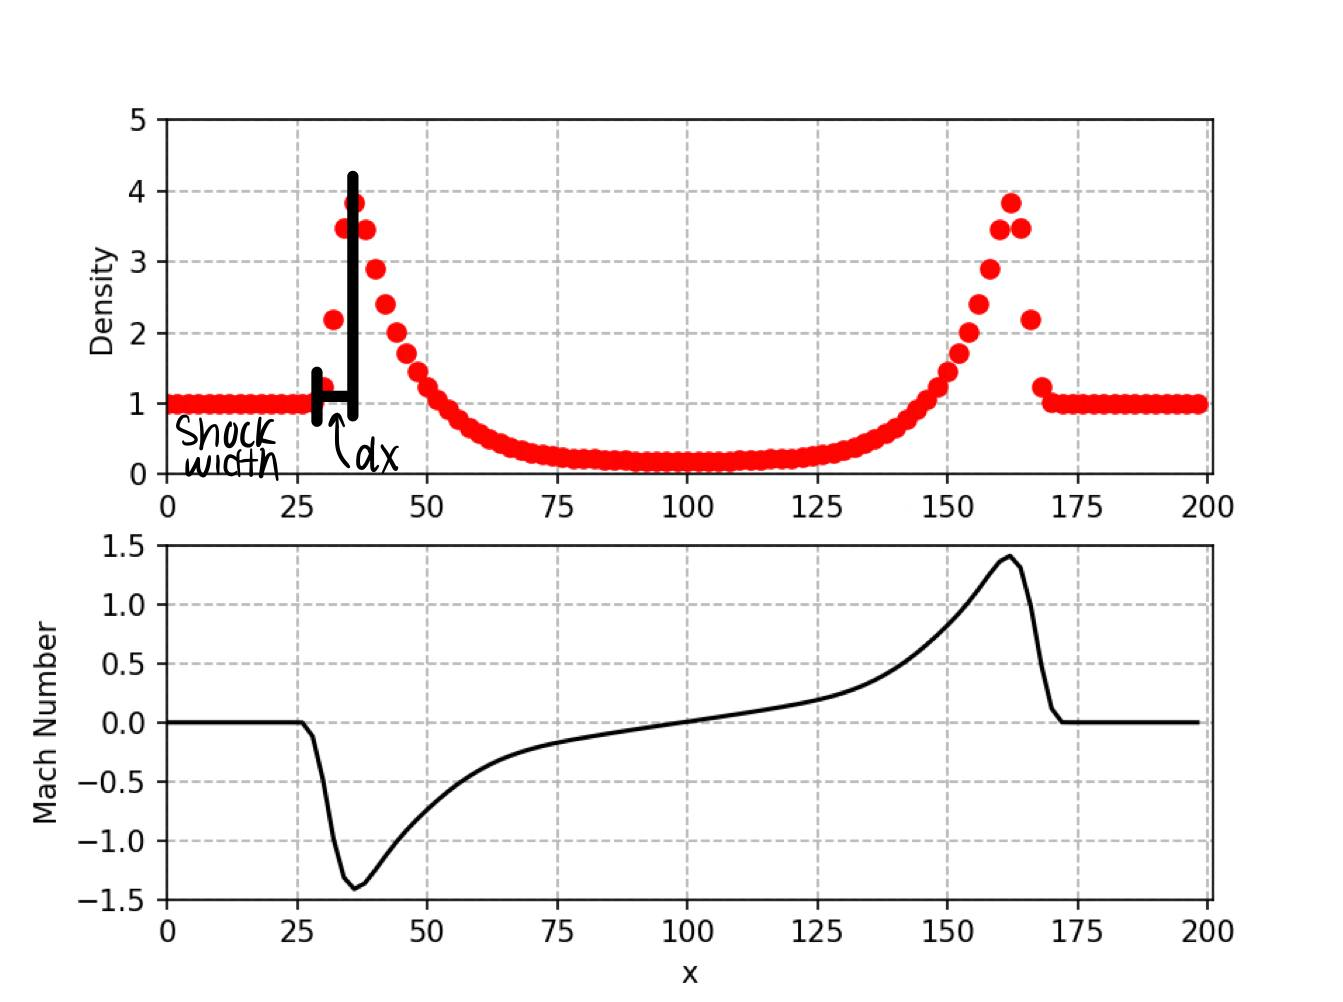
From the above, we marked off an estimate of the shock width for our baseline paramters (the ones in the code above). The shock width is the width between the pre- and post- shock locations from 1.1, so the width between the "baseline" 1 right before its perturbed by the shock and the top of the "peak" in the plot. We think that varying the properties of the medium might change the width of the shock. 

First, we varried the baseline density, changing it from 1 to 10:
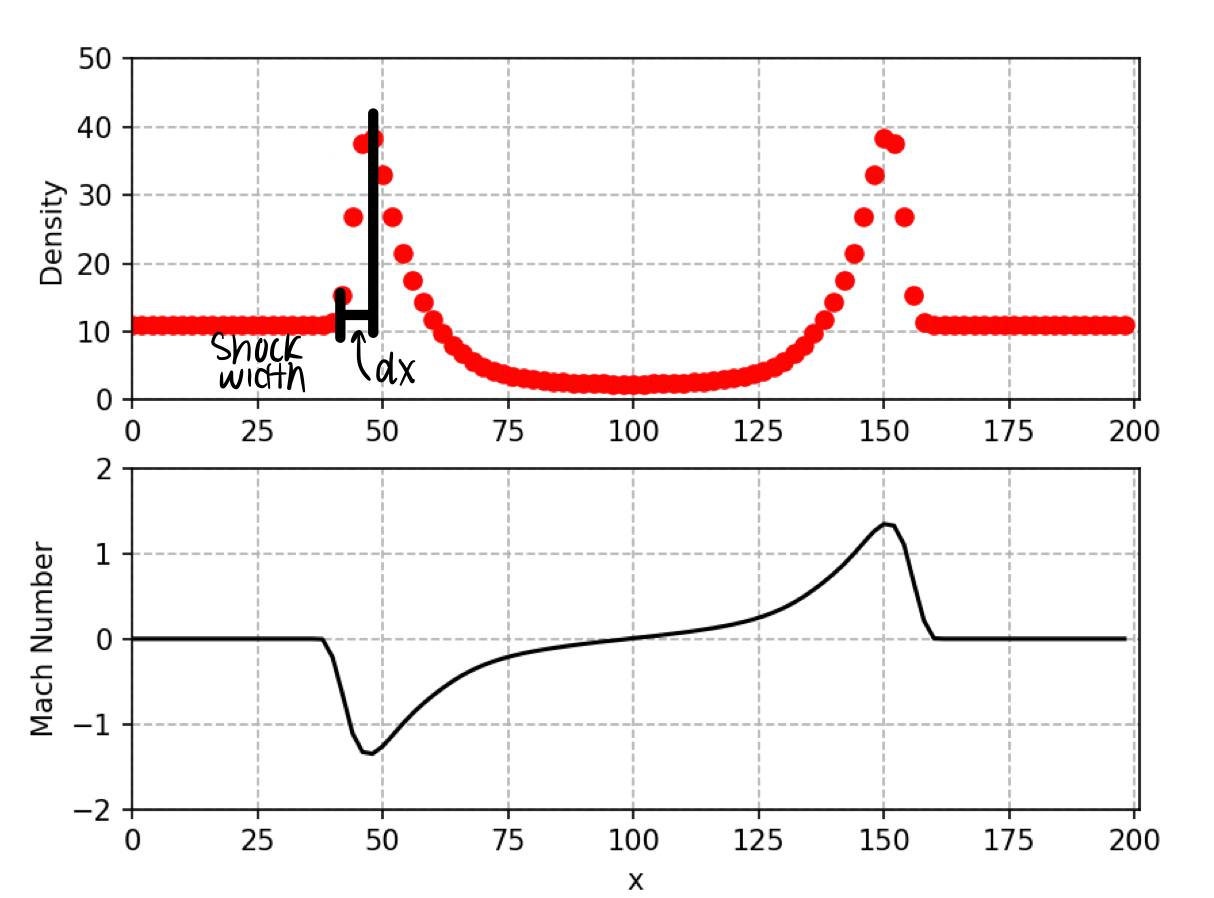
We see no change in the shock width.

Then, I tried varying gamma, changing it from 5/3 to 5.
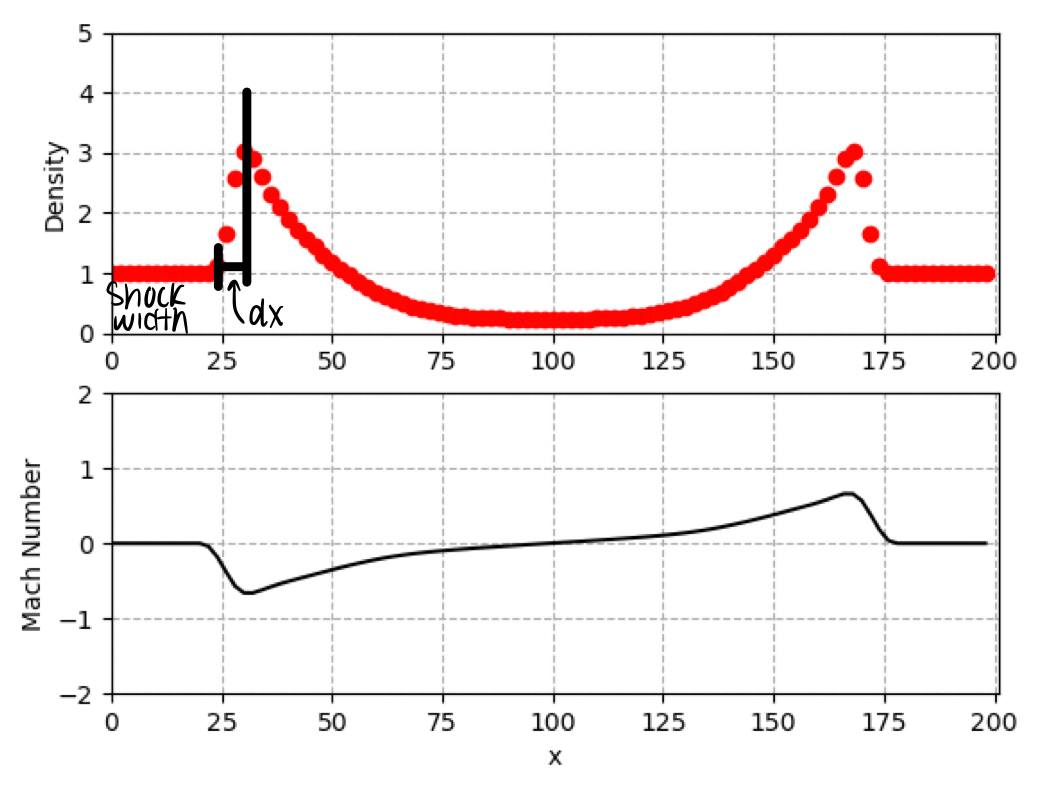
Again no change. dx just sets the resolution of the grid, as dt affects the amplitude and the propagation speed, so changing those will not affect the width.